# Random sample imputation
## Replace missing values with random values selected from other values of the same column
Preserves the variance and distribution


In [125]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [127]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


### Percentage of missing values (NaNs) in each column.

In [128]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [129]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [130]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [131]:
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [132]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [133]:
X_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


### Fills the NaN values in Age_imputed by sampling from the non-missing 'Age' values of the training set

In [134]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [135]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([19.  , 50.  , 45.  , 30.  , 26.  ,  6.  , 45.  , 29.  , 20.  ,
       70.  , 24.  , 22.  ,  3.  , 39.  , 61.  , 43.  , 45.  , 16.  ,
        0.67, 24.  , 27.  , 51.  , 24.  , 62.  , 71.  ,  9.  , 41.  ,
       21.  , 36.  , 26.  ,  2.  , 32.5 , 31.  , 25.  , 41.  ,  0.83,
       23.  , 26.  , 36.  , 28.  , 45.  , 36.  , 49.  , 23.  , 18.  ,
       14.  , 24.  , 39.  , 25.  , 39.  , 18.  , 15.  , 54.  , 35.  ,
       23.  , 26.  , 29.  , 22.  , 62.  , 33.  , 24.  , 18.  , 25.  ,
       29.  , 47.  , 28.  , 22.  , 35.  , 22.  , 40.  , 43.  , 49.  ,
       23.  , 17.  , 48.  , 29.  , 28.  ,  6.  , 44.  , 34.  , 14.5 ,
       40.  , 31.  , 44.  , 23.  ,  4.  , 27.  , 16.  , 25.  , 31.  ,
       60.  , 28.  ,  9.  , 24.  , 27.  , 38.  , 50.  , 25.  , 62.  ,
       60.  , 30.  ,  9.  , 16.  , 21.  , 52.  , 22.  , 32.  , 27.  ,
       35.  , 43.  ,  4.  , 26.  , 35.  , 51.  , 20.  , 35.  , 29.  ,
       19.  , 45.  , 20.  , 38.  ,  2.  , 31.  , 50.  , 19.  , 36.5 ,
       24.  , 24.  ,

In [136]:
X_train['Age'].isnull().sum()

148

In [137]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,31.0
493,71.0,49.5042,71.0
527,NaN,221.7792,36.0


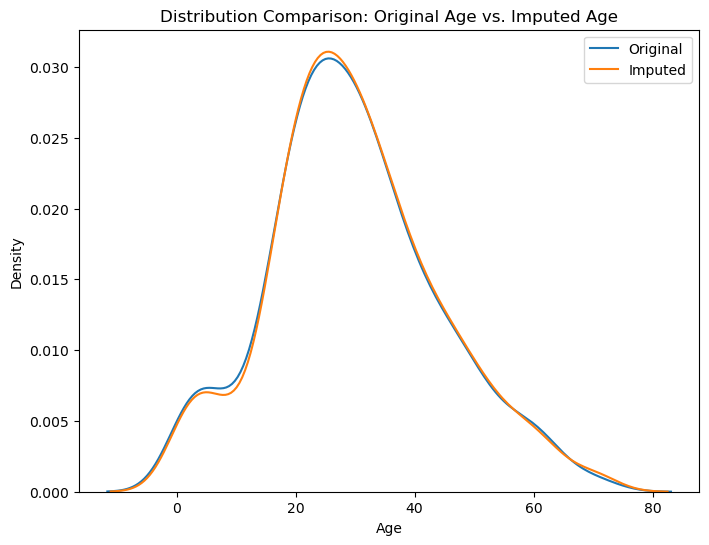

In [138]:
plt.figure(figsize=(8, 6)) # Add a figure to make the plot cleaner
sns.kdeplot(X_train['Age'], label='Original')
sns.kdeplot(X_train['Age_imputed'], label='Imputed')
plt.title('Distribution Comparison: Original Age vs. Imputed Age')
plt.xlabel('Age')
plt.legend()
plt.show()

In [139]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.3495133904614
Variance after random imputation:  203.82778391567496


In [140]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,55.471077
Age,71.512440,204.349513,204.349513
Age_imputed,55.471077,204.349513,203.827784


<Axes: >

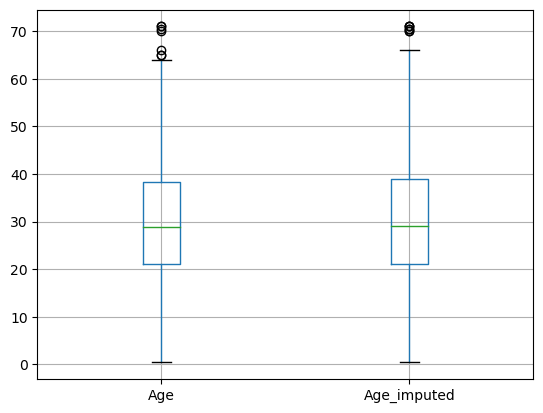

In [141]:
X_train[['Age', 'Age_imputed']].boxplot()

In [142]:
X_train['Age'].dropna().sample(missing_count).values 
# This returns a NumPy array (.values), which has NO index.

array([54.  , 45.  , 30.  , 16.  ,  0.42, 47.  , 35.  , 27.  , 25.  ,
        3.  , 50.  , 18.  , 28.  , 28.  , 19.  , 44.  , 48.  , 24.  ,
       30.  , 40.  , 19.  , 40.  , 13.  ,  2.  , 25.  , 29.  , 23.  ,
       40.  , 21.  , 27.  , 45.  ,  0.83, 45.  , 19.  , 36.  , 25.  ,
       41.  , 71.  , 35.  , 36.  ,  4.  , 28.5 , 42.  , 12.  , 14.  ,
       24.  , 27.  , 31.  , 27.  , 21.  , 35.  , 44.  , 29.  , 31.  ,
        9.  ,  9.  , 32.  , 11.  , 19.  , 45.  , 40.  ,  8.  , 32.5 ,
       26.  , 20.  , 25.  , 30.  , 24.  , 16.  , 24.  , 27.  , 24.  ,
       45.  , 24.  , 58.  , 50.  , 43.  , 23.  , 32.  , 36.  , 24.  ,
       33.  , 20.  , 37.  , 62.  , 27.  ,  2.  , 39.  , 24.  , 62.  ,
       43.  , 13.  , 34.  , 53.  , 27.  , 34.  , 65.  , 29.  , 25.  ,
        1.  , 38.  , 14.  , 30.  , 42.  , 54.  , 18.  , 46.  , 21.  ,
       28.  , 28.  , 44.  ,  2.  , 25.  , 24.  , 33.  , 54.  , 42.  ,
       39.  , 20.  , 36.  , 16.  , 30.  , 24.  , 56.  , 22.  , 23.  ,
       16.  , 27.  ,

In [143]:
data = pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [144]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [145]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [146]:
X = data
y = data['SalePrice']

In [147]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [148]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [149]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
289,NaN,TA,153575,TA,NaN
1068,Gd,TA,151400,TA,Gd
989,NaN,TA,197000,TA,NaN
147,Gd,TA,222500,TA,Gd
106,NaN,Fa,100000,Fa,NaN


In [150]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

In [151]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [152]:
temp

,original,imputed
TA,0.951043,0.952055
Fa,0.037171,0.036815
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [153]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.656566
TA,0.412439,0.533109
Fa,0.040917,0.053872
Po,0.027823,0.035915
Ex,0.024550,0.031425


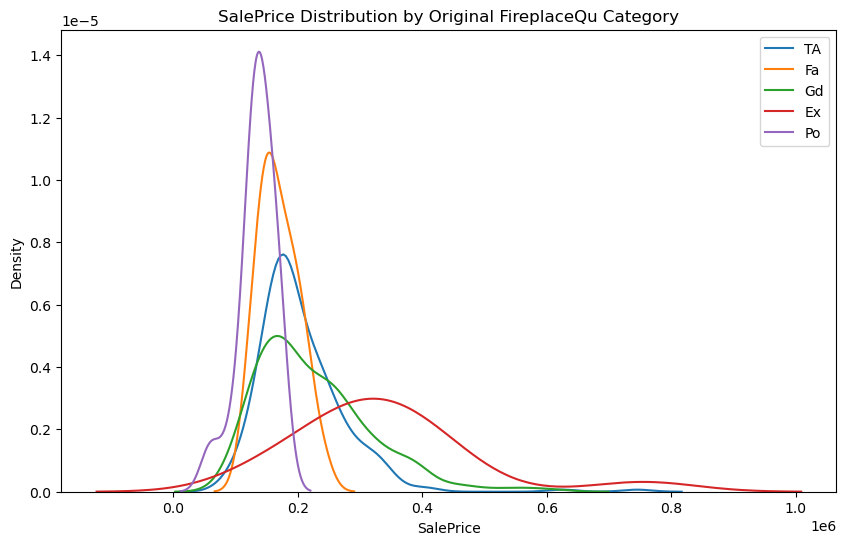

In [157]:
plt.figure(figsize=(10, 6))

for category in X_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'], label=category)
plt.title('SalePrice Distribution by Original FireplaceQu Category')
plt.xlabel('SalePrice')
plt.legend()
plt.show()

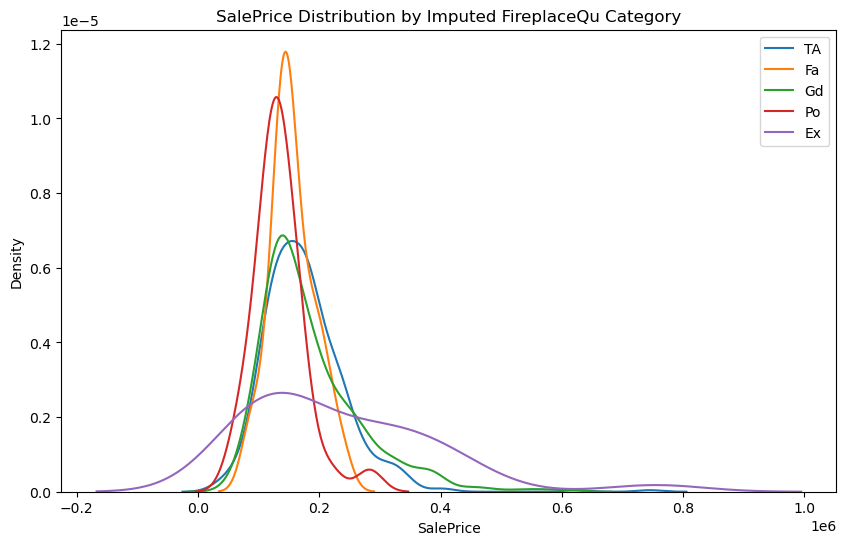

In [158]:
plt.figure(figsize=(10, 6))
plt.title('SalePrice Distribution by Imputed FireplaceQu Category')
plt.xlabel('SalePrice')
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'], label=category)

plt.legend()
plt.show()